## Data Overview

In [49]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression

In [50]:
#Read data
df = pd.read_csv("loan.csv", low_memory = False)

#An overview of the data
df.iloc[:,0:15].head(10)

,x,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,delinq_2yrs
0,20,571203,18000,18000,60 months,0.1016,383.87,10+ years,MORTGAGE,72804.0,Current,credit_card,MA,16.73,0.0
1,40,641849,13200,13200,36 months,0.1849,480.47,2 years,RENT,110000.0,Current,debt_consolidation,IL,17.02,0.0
2,60,694891,15675,15675,36 months,0.0890,497.74,10+ years,MORTGAGE,100000.0,Current,small_business,WA,9.10,0.0
3,80,734736,21600,21600,36 months,0.0790,675.87,10+ years,MORTGAGE,95000.0,Fully Paid,house,WI,3.42,0.0
4,100,784712,16500,16500,60 months,0.0790,333.78,2 years,MORTGAGE,42000.0,Late (31-120 days),small_business,NY,10.43,0.0
5,120,807342,21000,21000,36 months,0.0662,644.78,10+ years,MORTGAGE,121392.0,Current,major_purchase,PA,19.53,0.0
6,140,843448,5500,5500,36 months,0.1367,187.10,3 years,RENT,55000.0,Fully Paid,debt_consolidation,NJ,20.71,0.0
7,160,880114,5600,5600,36 months,0.0999,180.67,1 year,RENT,75000.0,Current,debt_consolidation,NY,8.24,0.0
8,180,974654,6400,6400,36 months,0.1580,224.38,2 years,RENT,34000.0,Current,debt_consolidation,VA,32.40,0.0
9,200,999547,16000,16000,36 months,0.1016,517.48,NaN,RENT,155000.0,Late (31-120 days),debt_consolidation,CA,26.49,0.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   x                       10000 non-null  int64  
 1   id                      10000 non-null  int64  
 2   loan_amnt               10000 non-null  int64  
 3   funded_amnt             10000 non-null  int64  
 4   term                    9524 non-null   object 
 5   int_rate                9524 non-null   float64
 6   installment             9524 non-null   float64
 7   emp_length              9119 non-null   object 
 8   home_ownership          9524 non-null   object 
 9   annual_inc              9524 non-null   float64
 10  loan_status             9524 non-null   object 
 11  purpose                 9524 non-null   object 
 12  addr_state              10000 non-null  object 
 13  dti                     9524 non-null   float64
 14  delinq_2yrs             9524 non-null  

In [52]:
# The outcome variable: loan_status

df["loan_status"].value_counts()

Current               8122
Fully Paid             951
Charged Off            218
Late (31-120 days)     148
In Grace Period         48
Late (16-30 days)       21
Default                 16
Name: loan_status, dtype: int64

In [53]:
#Use the dropna command to delete the 4.76% of samples with severe data missing and complete the data set preprocessing.
df = df.dropna(thresh= 5)

In [54]:
df.dropna(subset=['loan_status'],inplace=True)
df.drop(['x'],axis=1,inplace=True)


In [55]:
df

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,...,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int
0,571203,18000,18000,60 months,0.1016,383.87,10+ years,MORTGAGE,72804.0,Current,...,0.0,1995/12/27 2:06,NaN,21.0,8751.0,49.0,13263.18,7273.77,4736.82,2536.95
1,641849,13200,13200,36 months,0.1849,480.47,2 years,RENT,110000.0,Current,...,0.0,2000/12/11 11:15,29.0,16.0,16062.0,36.0,10546.93,4324.23,2653.07,1671.16
2,694891,15675,15675,36 months,0.0890,497.74,10+ years,MORTGAGE,100000.0,Current,...,0.0,1994/4/7 12:00,NaN,16.0,20650.0,45.0,15294.25,496.78,380.75,116.03
3,734736,21600,21600,36 months,0.0790,675.87,10+ years,MORTGAGE,95000.0,Fully Paid,...,0.0,1999/5/5 10:59,NaN,9.0,416.0,24.0,0.00,23521.69,21600.00,1921.69
4,784712,16500,16500,60 months,0.0790,333.78,2 years,MORTGAGE,42000.0,Late (31-120 days),...,0.0,1993/7/16 8:41,NaN,9.0,2229.0,17.0,12966.64,5000.85,3533.36,1467.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10123424,14000,14000,60 months,0.1757,352.25,7 years,MORTGAGE,40000.0,Current,...,0.0,2004/8/7 12:00,40.0,12.0,7394.0,20.0,13853.52,350.37,146.48,203.89
9996,10123620,15000,15000,36 months,0.1353,509.25,10+ years,MORTGAGE,40000.0,Current,...,2.0,1990/11/8 12:00,13.0,16.0,12632.0,46.0,14660.87,507.76,339.13,168.63
9997,10123803,1200,1200,36 months,0.2340,46.71,NaN,OWN,45000.0,Current,...,0.0,1994/3/8 12:00,76.0,8.0,15110.0,20.0,1176.73,46.62,23.27,23.35
9998,10124808,10000,10000,36 months,0.0790,312.91,2 years,MORTGAGE,60000.0,Current,...,0.0,1980/11/19 12:00,73.0,9.0,17256.0,24.0,9505.14,624.66,494.86,129.80


In [8]:
new=df.to_csv("new.csv")

## Descriptive statistical analysis

In [44]:
pic_df = df.loc[:, df.columns.str.contains('num')]
df_analysis = (df.dropna(thresh= 5))\
                     .assign(int_rate = lambda x: x['int_rate'].str.strip('%'))

C:\Users\VeraHzz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


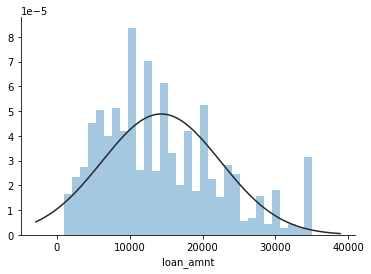

In [45]:
# Draw figures
# Please describe those figures and try to do your own analysis
plt.figure(1)
sns.distplot(df_analysis.loan_amnt,fit = norm, kde = False)
sns.despine(top = True)
#ingonre the font warning. It doesn't matter.
import warnings
warnings.filterwarnings('ignore')

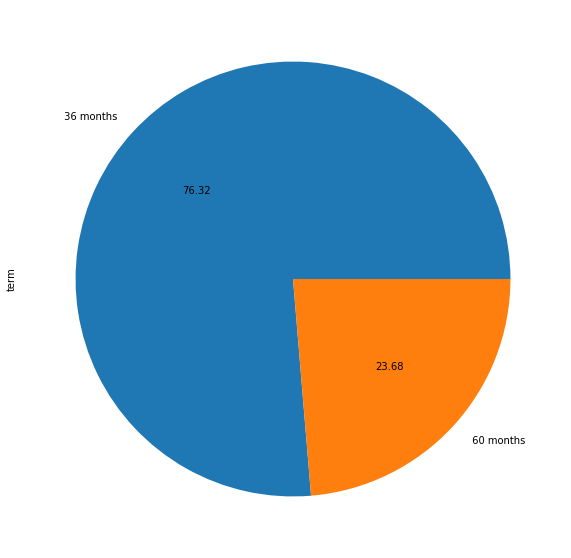

In [8]:
plt.figure(2)
df_analysis.term.value_counts().plot.pie(autopct = '%.2f',figsize = (10, 10))

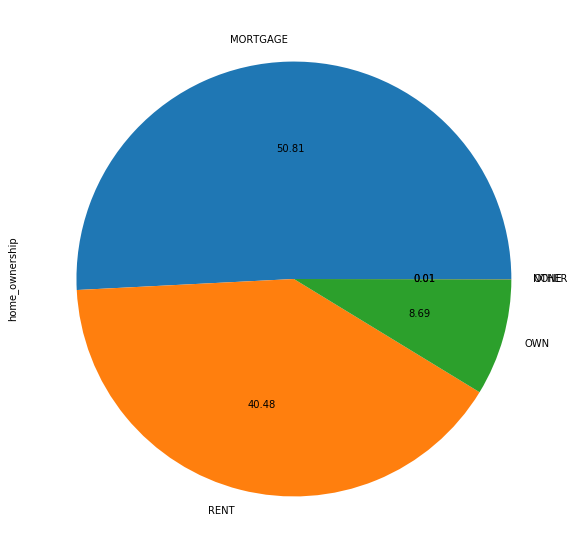

In [9]:
plt.figure(3)
df_analysis.home_ownership.value_counts().plot.pie(autopct = '%.2f',figsize = (10, 10))

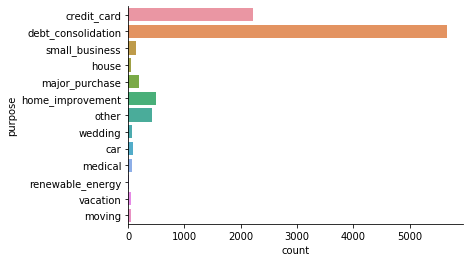

In [10]:
plt.figure(4)
sns.countplot(y = df_analysis.purpose)
sns.despine(top = True)

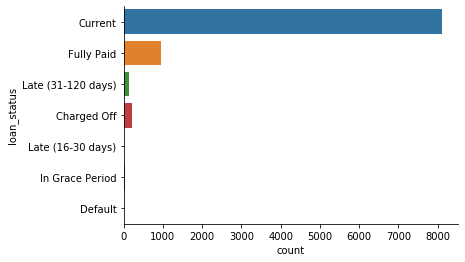

In [11]:
plt.figure(7)
sns.countplot(y = df_analysis.loan_status)
sns.despine(top = True)
plt.show()

In [12]:
# rough look into differences among loan_status groups
groupd_status =  df_analysis.groupby(['loan_status'])
pay_data = groupd_status.agg({'loan_amnt': 'sum','out_prncp': 'sum','total_rec_prncp': 'sum','total_rec_int': 'sum'}) \
                     .assign(loan_amnt_pct = lambda x : x['loan_amnt']/x['loan_amnt'].sum(),
                              out_prncp_pct = lambda x : x['out_prncp']/x['out_prncp'].sum())

print(pay_data)

                    loan_amnt    out_prncp  total_rec_prncp  total_rec_int  \
loan_status                                                                  
Charged Off           2862500         0.00        401936.64      270087.79   
Current             117253100  94740945.77      22499429.03    11620861.86   
Default                281225    234275.02         46949.98       35271.69   
Fully Paid           12687950         0.00      12687923.42     1086953.44   
In Grace Period        691575    535642.36        155932.65       90996.11   
Late (16-30 days)      276675    218485.30         58189.69       40363.09   
Late (31-120 days)    2348450   1926644.91        421805.08      311868.35   

                    loan_amnt_pct  out_prncp_pct  
loan_status                                       
Charged Off              0.020986       0.000000  
Current                  0.859618       0.970150  
Default                  0.002062       0.002399  
Fully Paid               0.093019       0.

## Your turn

Use machine learning models to uncover the relationship between features and loan status.

Please note that, In this project, you have great flexbility in processing the variables, such as categorizing a feature into meaningful types.


<AxesSubplot:ylabel='loan_status_new'>

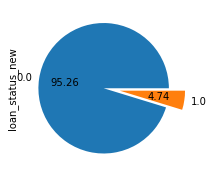

In [56]:
# identify 'bad' &'good'
good_loans = ['Current','Fully Paid']

def loan_status(status):
    if status in good_loans:
        return 0.
    else:
        return 1.
df['loan_status_new'] = df['loan_status'].apply(loan_status)
df.loan_status_new.value_counts().plot.pie(autopct = '%.2f',explode =[0,0.25],figsize = (3, 3))

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9524 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9524 non-null   int64  
 1   loan_amnt               9524 non-null   int64  
 2   funded_amnt             9524 non-null   int64  
 3   term                    9524 non-null   object 
 4   int_rate                9524 non-null   float64
 5   installment             9524 non-null   float64
 6   emp_length              9119 non-null   object 
 7   home_ownership          9524 non-null   object 
 8   annual_inc              9524 non-null   float64
 9   loan_status             9524 non-null   object 
 10  purpose                 9524 non-null   object 
 11  addr_state              9524 non-null   object 
 12  dti                     9524 non-null   float64
 13  delinq_2yrs             9524 non-null   float64
 14  earliest_cr_line        9524 non-null   

In [58]:
# drop useless feature and feature with too many null values
df.drop(['id','loan_status','mths_since_last_delinq','earliest_cr_line'],axis=1,inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9524 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_amnt        9524 non-null   int64  
 1   funded_amnt      9524 non-null   int64  
 2   term             9524 non-null   object 
 3   int_rate         9524 non-null   float64
 4   installment      9524 non-null   float64
 5   emp_length       9119 non-null   object 
 6   home_ownership   9524 non-null   object 
 7   annual_inc       9524 non-null   float64
 8   purpose          9524 non-null   object 
 9   addr_state       9524 non-null   object 
 10  dti              9524 non-null   float64
 11  delinq_2yrs      9524 non-null   float64
 12  open_acc         9524 non-null   float64
 13  revol_bal        9524 non-null   float64
 14  total_acc        9524 non-null   float64
 15  out_prncp        9524 non-null   float64
 16  total_pymnt      9524 non-null   float64
 17  total_rec_prnc

In [60]:
#ordinal variable----emp_length
mapping_dict ={'emp_length':{'10+ years':10,'9 years':9,'8 years':8,'7 years':7,'6 years':6,'5 years':5,'4 years':4,'3 years':3,'2 years':2,'1 year':1,'< 1 year':0}}
new_df = df.replace(mapping_dict)
new_df['emp_length'] = new_df['emp_length'].fillna(method='bfill')  

In [61]:
##ordinal variable----annual_inc
bins=7
def binning(df,col,method,bins):
    uniqs=df[col].nunique()
    if uniqs<=bins:
        raise KeyError('nunique is smaller than bins: '+col)
        return 
    def ff(x,fre_list):
        if x<=fre_list[0]:
            return 0
        elif x>fre_list[-1]:
            return len(fre_list)-1
        else :
            for i in range(len(fre_list)-1):
                if x>fre_list[i] and x<=fre_list[i+1]:
                    return i
    if method=='distance':
        umax=np.percentile(df[col],99.99)
        umin=np.percentile(df[col],0.01)
        step=(umax-umin)/bins
        fre_list=[umin+i*step for i in range(bins+1)]
        return df[col].map(lambda x:ff(x,fre_list))
    elif method=='frequency' :
        fre_list=[np.percentile(df[col],100/bins*i) for i in range(bins+1)]
        fre_list=sorted(list(set(fre_list)))
        return df[col].map(lambda x:ff(x,fre_list))

new_df['annual_inc_bins'] = binning(df = new_df,col = 'annual_inc',method='frequency',bins=bins)
new_df.drop(['annual_inc'],axis=1,inplace=True)

In [62]:
# Categorical Variables
dummies = ['home_ownership','purpose','addr_state']
new_df2= pd.get_dummies(new_df[dummies])

In [63]:
new_df3= pd.concat((new_df,new_df2),axis = 1)

In [64]:
new_df3.drop(dummies,axis=1,inplace=True)

In [65]:
new_df3.head(5)

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,dti,delinq_2yrs,open_acc,revol_bal,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,18000,18000,60 months,0.1016,383.87,10.0,16.73,0.0,21.0,8751.0,...,0,0,0,0,0,0,0,0,0,0
1,13200,13200,36 months,0.1849,480.47,2.0,17.02,0.0,16.0,16062.0,...,0,0,0,0,0,0,0,0,0,0
2,15675,15675,36 months,0.0890,497.74,10.0,9.10,0.0,16.0,20650.0,...,0,0,0,0,0,0,1,0,0,0
3,21600,21600,36 months,0.0790,675.87,10.0,3.42,0.0,9.0,416.0,...,0,0,0,0,0,0,0,1,0,0
4,16500,16500,60 months,0.0790,333.78,2.0,10.43,0.0,9.0,2229.0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
listType = new_df3['term'].unique() 
#60months
data1 =  new_df3[new_df3['term'].isin([listType[0]])]
#36months
data2 =  new_df3[new_df3['term'].isin([listType[1]])]

## 1）models with term of 60months

In [67]:
y1 = data1['loan_status_new']
data1.drop(['loan_status_new','term'],axis = 1,inplace=True)
scaler = StandardScaler()
data1_standard = scaler.fit_transform(data1)

C:\Users\VeraHzz\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:
data1_new = pd.DataFrame(data1_standard ,columns = data1.columns)
data1_new.head(5)

,loan_amnt,funded_amnt,int_rate,installment,emp_length,dti,delinq_2yrs,open_acc,revol_bal,total_acc,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,-0.380602,-0.379622,-1.978220,-0.731249,0.994907,-0.195310,-0.356111,2.006584,-0.615765,2.088891,...,-0.055802,-0.123727,-0.295417,-0.110084,-0.215415,-0.029794,-0.161036,-0.121867,-0.084534,-0.063302
1,-0.586353,-0.585246,-2.547922,-0.979746,-1.297025,-1.050740,-0.356111,-0.555375,-0.994438,-0.912411,...,-0.055802,-0.123727,-0.295417,-0.110084,-0.215415,-0.029794,-0.161036,-0.121867,-0.084534,-0.063302
2,-1.203606,-1.781293,-0.690087,-1.712487,0.135432,-1.720148,-0.356111,0.298611,-0.716965,-0.162085,...,-0.055802,-0.123727,-0.295417,-0.110084,4.642198,-0.029794,-0.161036,-0.121867,-0.084534,-0.063302
3,-0.106268,-0.105456,-0.185925,-0.155326,0.994907,-0.422067,-0.356111,-0.128382,0.129795,0.306868,...,-0.055802,-0.123727,-0.295417,-0.110084,4.642198,-0.029794,-0.161036,-0.121867,-0.084534,-0.063302
4,0.932773,0.932945,-1.340455,0.455325,-1.583517,1.292867,-0.356111,0.298611,1.491961,0.213077,...,-0.055802,-0.123727,-0.295417,-0.110084,-0.215415,-0.029794,-0.161036,-0.121867,-0.084534,-0.063302


In [69]:
x1= data1_new

In [70]:
good1= y1[y1==0].shape[0]
bad1=y1[y1==1].shape[0]
print('The number of samples are {},good rate is {:.2%},bad rate is {:.2%}'.format(good1+bad1,good1/(good1+bad1),bad1/(good1+bad1)))

The number of samples are 2255,good rate is 94.01%,bad rate is 5.99%


In [71]:
#imbalanced data
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state = 42)
x1_smo,y1_smo = smo.fit_sample(x1,y1)

In [72]:
y1_sample = pd.DataFrame(y1_smo)
y1_sample.columns = ['y']
good1= y1_sample[y1_sample['y']==0].shape[0]
bad1= y1_sample[y1_sample['y']==1].shape[0]
print('The number of samples are {},good rate is {:.2%},bad rate is {:.2%}'.format(good1+bad1,good1/(good1+bad1),bad1/(good1+bad1)))

The number of samples are 4240,good rate is 50.00%,bad rate is 50.00%


In [73]:
# logistic regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 

train_x1,test_x1,train_y1,test_y1 = train_test_split(x1_smo,y1_sample,test_size = 0.3,random_state = 42)
logit=LogisticRegression()
best_ting = {'max_iter':[20,40,60,100],'C':[0.01,0.1,1,10,100,1000]}
best_logit= GridSearchCV(logit,param_grid=best_ting,cv=5)
best_logit.fit(train_x1,train_y1)

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [20, 40, 60, 100]})

In [74]:
print(best_logit.best_params_)
print(best_logit.best_score_)

{'C': 1000, 'max_iter': 100}
0.8271449741938781


In [75]:
predicted_y1= best_logit.predict(test_x1)

In [76]:
# evaluate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

print(confusion_matrix(test_y1, predicted_y1))
print(classification_report(test_y1, predicted_y1))
print(roc_auc_score(test_y1, predicted_y1))

[[521 119]
 [104 528]]
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       640
         1.0       0.82      0.84      0.83       632

    accuracy                           0.82      1272
   macro avg       0.82      0.82      0.82      1272
weighted avg       0.82      0.82      0.82      1272

0.8247527689873417


In [77]:
# random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
param_grid = {"n_estimators": range(1,40), 'max_features': [2, 4, 6, 8]}
best_rf = GridSearchCV(rf, param_grid=param_grid)
best_rf.fit(train_x1,train_y1)

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': range(1, 40)})

In [78]:
print(best_rf.best_params_)
print(best_rf.best_score_)

{'max_features': 2, 'n_estimators': 37}
0.9767495074409072


In [79]:
predicted_y1_rf= best_rf.predict(test_x1)

In [80]:
print(confusion_matrix(test_y1, predicted_y1_rf))
print(classification_report(test_y1, predicted_y1_rf))
print(roc_auc_score(test_y1, predicted_y1_rf))

[[630  10]
 [ 19 613]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       640
         1.0       0.98      0.97      0.98       632

    accuracy                           0.98      1272
   macro avg       0.98      0.98      0.98      1272
weighted avg       0.98      0.98      0.98      1272

0.9771558544303798


## 2）models with term of 36months

In [81]:
y2 = data2['loan_status_new']
data2.drop(['loan_status_new','term'],axis = 1,inplace=True)
data2_standard = scaler.fit_transform(data2)

C:\Users\VeraHzz\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [82]:
data2_new = pd.DataFrame(data2_standard ,columns = data2.columns)
data2_new

,loan_amnt,funded_amnt,int_rate,installment,emp_length,dti,delinq_2yrs,open_acc,revol_bal,total_acc,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,0.119861,0.120046,1.378254,0.261300,-1.093324,0.024888,-0.342244,1.137815,0.078584,1.119938,...,-0.049824,-0.107472,-0.29336,-0.086512,-0.169067,-0.048417,-0.155214,-0.110062,-0.071527,-0.055098
1,0.456988,0.457246,-1.083471,0.330362,1.148530,-1.012797,-0.342244,1.137815,0.398913,1.948287,...,-0.049824,-0.107472,-0.29336,-0.086512,-0.169067,-0.048417,6.442730,-0.110062,-0.071527,-0.055098
2,1.264051,1.264483,-1.340168,1.042695,1.148530,-1.756996,-0.342244,-0.415008,-1.013803,0.015473,...,-0.049824,-0.107472,-0.29336,-0.086512,-0.169067,-0.048417,-0.155214,9.085798,-0.071527,-0.055098
3,1.182323,1.182737,-1.668740,0.918368,1.148530,0.353751,-0.342244,1.581479,1.800248,1.211977,...,-0.049824,-0.107472,-0.29336,-0.086512,-0.169067,-0.048417,-0.155214,-0.110062,-0.071527,-0.055098
4,-0.928980,-0.929021,0.140974,-0.911871,-0.813093,0.508356,-0.342244,1.359647,-0.380545,0.107512,...,-0.049824,-0.107472,-0.29336,-0.086512,-0.169067,-0.048417,-0.155214,-0.110062,-0.071527,-0.055098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7264,0.320775,0.321003,0.477247,0.373671,-1.653788,-0.057655,1.145659,-1.524167,-0.784099,-1.273070,...,-0.049824,-0.107472,-0.29336,-0.086512,-0.169067,-0.048417,-0.155214,-0.110062,-0.071527,-0.055098
7265,0.365044,0.365282,0.105036,0.376390,1.148530,-0.128406,2.633563,1.137815,-0.160895,2.040326,...,-0.049824,-0.107472,-0.29336,-0.086512,-0.169067,-0.048417,-0.155214,-0.110062,-0.071527,-0.055098
7266,-1.514697,-1.514864,2.638636,-1.473284,-1.093324,1.363922,-0.342244,-0.636840,0.012116,-0.352682,...,-0.049824,-0.107472,-0.29336,-0.086512,-0.169067,-0.048417,6.442730,-0.110062,-0.071527,-0.055098
7267,-0.316021,-0.315930,-1.340168,-0.408764,-1.093324,-1.156920,-0.342244,-0.415008,0.161948,0.015473,...,-0.049824,-0.107472,-0.29336,-0.086512,-0.169067,-0.048417,-0.155214,-0.110062,-0.071527,-0.055098


In [83]:
good2= y2[y2==0].shape[0]
bad2=y2[y2==1].shape[0]
print('The number of samples are {},good rate is {:.2%},bad rate is {:.2%}'.format(good2+bad2,good2/(good2+bad2),bad2/(good2+bad2)))

The number of samples are 7269,good rate is 95.65%,bad rate is 4.35%


In [84]:
x2= data2_new

In [85]:
#imbalanced data
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state = 42)
x2_smo,y2_smo = smo.fit_sample(x2,y2)

In [86]:
y2_sample = pd.DataFrame(y2_smo)
y2_sample.columns = ['y2']
good2= y2_sample[y2_sample['y2']==0].shape[0]
bad2= y2_sample[y2_sample['y2']==1].shape[0]
print('The number of samples are {},good rate is {:.2%},bad rate is {:.2%}'.format(good2+bad2,good2/(good2+bad2),bad2/(good2+bad2)))

The number of samples are 13906,good rate is 50.00%,bad rate is 50.00%


In [87]:
# logistic regression
train_x2,test_x2,train_y2,test_y2 = train_test_split(x2_smo,y2_sample,test_size = 0.3,random_state = 42)
best_logit2= GridSearchCV(logit,param_grid=best_ting,cv=5)
best_logit2.fit(train_x2,train_y2)

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [20, 40, 60, 100]})

In [88]:
print(best_logit2.best_params_)
print(best_logit2.best_score_)

{'C': 1000, 'max_iter': 100}
0.8738452337403686


In [89]:
# evaluate
predicted_y2= best_logit2.predict(test_x2)

print(confusion_matrix(test_y2, predicted_y2))
print(classification_report(test_y2, predicted_y2))
print(roc_auc_score(test_y2, predicted_y2))

[[1954   97]
 [ 436 1685]]
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      2051
         1.0       0.95      0.79      0.86      2121

    accuracy                           0.87      4172
   macro avg       0.88      0.87      0.87      4172
weighted avg       0.88      0.87      0.87      4172

0.8735712917951961


In [90]:
# random forest
best_rf2 = GridSearchCV(rf, param_grid=param_grid)
best_rf2.fit(train_x2,train_y2)

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VeraHzz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': range(1, 40)})

In [91]:
print(best_rf2.best_params_)
print(best_rf2.best_score_)

{'max_features': 8, 'n_estimators': 33}
0.9864396222401345


In [92]:
predicted_y2_rf= best_rf2.predict(test_x2)

In [93]:
print(confusion_matrix(test_y2, predicted_y2_rf))
print(classification_report(test_y2, predicted_y2_rf))
print(roc_auc_score(test_y2, predicted_y2_rf))

[[2042    9]
 [  52 2069]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2051
         1.0       1.00      0.98      0.99      2121

    accuracy                           0.99      4172
   macro avg       0.99      0.99      0.99      4172
weighted avg       0.99      0.99      0.99      4172

0.9855475796238814


## Conclusion

In this project,random forest has higher accuracy and AUC score than logistic regression.